# Python for Finance Tutorial For Beginners

*This notebook was made in preparation for the DataCamp tutorial "Python for Finance Tutorial for Beginners"; If you want more explanations on the code or on using Python for Finance, go to the full tutorial [here](https://www.datacamp.com/community/tutorials/finance-python-trading).*

The full tutorial covers the following topics:

* Getting Started With Python For Finance
    - Stocks & Trading
    - Time Series Data
    - Setting Up The Workspace
    - [Python Basics For Finance: Pandas](#basics)
        - Importing Financial Data Into Python
        - Working With Time Series Data 
        - Visualizing Time Series Data
* [Common Financial Analyses](#commonanalyses)
    - Returns
    - Moving Windows
    - Volatility Calculation
    - Ordinary Least-Squares Regression (OLS)
* [Building A Trading Strategy With Python](#tradingstrategy)
* [Backtesting A Strategy](#backtesting)
    - Implementation Of A Simple Backtester
    - Backtesting With Zipline And Quantopian
* Improving A Trading Strategy
* [Evaluating The Trading Strategy](#evaluating)
    - Sharpe Ratio
    - Maximum Drawdown
    - Compound Annual Growth Rate
* What now?

![DataCamp courses](http://community.datacamp.com.s3.amazonaws.com/community/production/ckeditor_assets/pictures/293/content_blog_banner.png)

In [43]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

<a id='basics'></a>
## Python Basics For Finance: Pandas

### Importing Data
At this moment, there is a lot going on in the open-source community because of the changes to the Yahoo! Finance API. That's why you don't only use the `pandas_datareader` package, but also a custom fix `fix_yahoo_finance` to get your data:

In [44]:
from pandas_datareader import data as pdr
import fix_yahoo_finance

import datetime 
aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2006, 10, 1), 
                          end=datetime.datetime(2012, 1, 1))
aapl.head()

https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1159653600&period2=1325372400&interval=1d&events=history&crumb=DujEI1VwC3H


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-10-02,10.728572,10.838572,10.614285,74.860001,10.694285,178159800
2006-10-03,10.635715,10.707143,10.455714,74.080002,10.582857,197677200
2006-10-04,10.585714,10.780000,10.451428,75.380005,10.768572,207270700
2006-10-05,10.647142,10.880000,10.590000,74.829994,10.690000,170970800
2006-10-06,10.631429,10.720000,10.544286,74.220001,10.602858,116739700


The `pandas_datareader` offers a lot of possibilities to get financial data. If you don't want to make use of this package, however, you can also use Quandl to retrieve data:

In [45]:
import quandl 
aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.30,74.86,25451400.0,0.0,1.0,9.690557,9.789914,9.587328,9.659588,178159800.0
2006-10-03,74.45,74.950,73.19,74.07,28239600.0,0.0,1.0,9.606684,9.671201,9.444099,9.557650,197677200.0
2006-10-04,74.10,75.462,73.16,75.38,29610100.0,0.0,1.0,9.561521,9.737268,9.440228,9.726687,207270700.0
2006-10-05,74.53,76.160,74.13,74.83,24424400.0,0.0,1.0,9.617007,9.827334,9.565392,9.655717,170970800.0
2006-10-06,74.42,75.040,73.81,74.22,16677100.0,0.0,1.0,9.602813,9.682815,9.524101,9.577006,116739700.0


In [46]:
# Alternatively, you can load in a data set that has been retrieved for you already from Yahoo! Finance: 
aapl = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/aapl.csv", header=0, index_col= 0, names=['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], parse_dates=True)

### Working With Time Series Data

In [47]:
# Inspect the index 
aapl.index

# Inspect the columns
aapl.columns

# Select only the last 10 observations of `Close`
ts = aapl['Close'][-10:]

# Check the type of `ts` 
type(ts)

pandas.core.series.Series

In [48]:
# Inspect the first rows of November-December 2006
print(aapl.loc[pd.Timestamp('2006-11-01'):pd.Timestamp('2006-12-31')].head())

# Inspect the first rows of 2007 
print(aapl.loc['2007'].head())

# Inspect November 2006
print(aapl.iloc[22:43])

# Inspect the 'Open' and 'Close' values at 2006-11-01 and 2006-12-01
print(aapl.iloc[[22,43], [0, 3]])

             Open   High    Low      Close       Volume  Adj Close
2006-11-01  81.10  81.38  78.36  79.160004  152798100.0  11.308572
2006-11-02  78.92  79.32  78.50  78.979996  116370800.0  11.282857
2006-11-03  79.36  79.53  77.79  78.290001  107972200.0  11.184286
2006-11-06  78.95  80.06  78.43  79.709999  108644200.0  11.387143
2006-11-07  80.45  81.00  80.13  80.510002  131483100.0  11.501429
             Open   High    Low      Close       Volume  Adj Close
2007-01-03  86.29  86.58  81.90  83.800003  309579900.0  11.971429
2007-01-04  84.05  85.95  83.82  85.659996  211815100.0  12.237143
2007-01-05  85.77  86.20  84.40  85.049995  208685400.0  12.150000
2007-01-08  85.96  86.53  85.28  85.470001  199276700.0  12.210000
2007-01-09  86.45  92.98  85.15  92.570000  837324600.0  13.224286
             Open   High    Low      Close       Volume  Adj Close
2006-11-01  81.10  81.38  78.36  79.160004  152798100.0  11.308572
2006-11-02  78.92  79.32  78.50  78.979996  116370800.0  11.28

In [49]:
# Sample 20 rows
sample = aapl.sample(20)

# Print `sample`
print(sample)

# Resample to monthly level 
monthly_aapl = aapl.resample('M')

# Print `monthly_aapl`
print(monthly_aapl)

              Open    High     Low       Close       Volume  Adj Close
2011-03-04  360.07  360.29  357.75  360.000000  113316700.0  51.428570
2007-09-12  135.99  139.40  135.75  136.849991  255692500.0  19.549999
2009-12-24  203.55  209.35  203.35  209.040009  125222300.0  29.862858
2006-10-24   81.21   81.68   80.20   81.050003  115803100.0  11.578571
2009-11-17  206.08  207.44  205.00  207.000000   99128400.0  29.571428
2009-11-30  201.11  201.68  198.77  199.910004  106214500.0  28.558571
2011-06-20  317.36  317.70  310.50  315.320007  160161400.0  45.045715
2007-01-18   92.10   92.11   89.05   89.070000  591151400.0  12.724286
2011-10-28  403.00  406.35  402.51  404.949982   80710700.0  57.849998
2008-04-01  146.30  149.66  143.61  149.529999  258141800.0  21.361429
2011-01-20  336.43  338.30  330.12  332.679993  191197300.0  47.525715
2009-09-28  183.87  186.68  183.33  186.149994   84361200.0  26.592857
2009-01-15   80.57   84.12   80.05   83.379997  457908500.0  11.911428
2009-0

In [50]:
# Add a column `diff` to `aapl` 
aapl['diff'] = aapl.Open - aapl.Close

# Delete the new `diff` column
del aapl['diff']

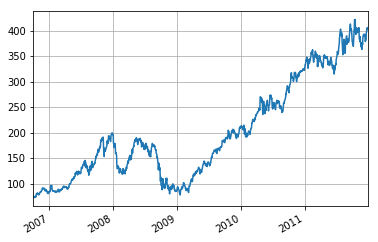

In [51]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
aapl['Close'].plot(grid=True)

# Show the plot
plt.show()

<a id='commonanalyses'></a>
## Common Financial Analysis

### Returns

In [52]:
# Assign `Adj Close` to `daily_close`
daily_close = aapl[['Adj Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj Close
2006-10-02   0.000000
2006-10-03  -0.010419
2006-10-04   0.017549
2006-10-05  -0.007296
2006-10-06  -0.008152
2006-10-09   0.005524
2006-10-10  -0.010987
2006-10-11  -0.007858
2006-10-12   0.027721
2006-10-13  -0.003189
2006-10-16   0.005065
2006-10-17  -0.014721
2006-10-18   0.003231
2006-10-19   0.059842
2006-10-20   0.012153
2006-10-23   0.018887
2006-10-24  -0.005033
2006-10-25   0.007773
2006-10-26   0.006244
2006-10-27  -0.021657
2006-10-30   0.000124
2006-10-31   0.008207
2006-11-01  -0.023680
2006-11-02  -0.002274
2006-11-03  -0.008736
2006-11-06   0.018138
2006-11-07   0.010036
2006-11-08   0.024096
2006-11-09   0.010794
2006-11-10  -0.002640
...               ...
2011-11-17  -0.019128
2011-11-18  -0.006545
2011-11-21  -0.015816
2011-11-22   0.020325
2011-11-23  -0.025285
2011-11-25  -0.009319
2011-11-28   0.034519
2011-11-29  -0.007764
2011-11-30   0.024116
2011-12-01   0.014992
2011-12-02   0.004563
2011-12-05   0.008494
2011-12-06  -0.005242
2011-12-07

In [53]:
# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,Open,High,Low,Close,Volume,Adj Close
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,0.125777,0.126451,0.121460,0.122860,0.369611,0.122860
2007-06-30,0.196030,0.195413,0.198331,0.197735,-0.080296,0.197735
2007-10-31,0.400961,0.404613,0.392010,0.400796,0.306882,0.400796
2008-02-29,0.127066,0.130711,0.117746,0.120394,0.172293,0.120394
2008-06-30,-0.003550,-0.004290,0.005927,0.003673,-0.209762,0.003673
2008-10-31,-0.114267,-0.108879,-0.124618,-0.118803,0.133219,-0.118803
2009-02-28,-0.363639,-0.363388,-0.359305,-0.360865,-0.161601,-0.360865
2009-06-30,0.312134,0.304359,0.324702,0.316588,-0.386935,0.316588
2009-10-31,0.421239,0.411193,0.425117,0.415901,-0.158270,0.415901


In [54]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

            Adj Close
2006-10-02        NaN
2006-10-03  -0.010419
2006-10-04   0.017549
2006-10-05  -0.007296
2006-10-06  -0.008152
2006-10-09   0.005524
2006-10-10  -0.010987
2006-10-11  -0.007858
2006-10-12   0.027721
2006-10-13  -0.003189
2006-10-16   0.005065
2006-10-17  -0.014721
2006-10-18   0.003231
2006-10-19   0.059842
2006-10-20   0.012153
2006-10-23   0.018887
2006-10-24  -0.005033
2006-10-25   0.007773
2006-10-26   0.006244
2006-10-27  -0.021657
2006-10-30   0.000124
2006-10-31   0.008207
2006-11-01  -0.023680
2006-11-02  -0.002274
2006-11-03  -0.008736
2006-11-06   0.018138
2006-11-07   0.010036
2006-11-08   0.024096
2006-11-09   0.010794
2006-11-10  -0.002640
...               ...
2011-11-17  -0.019128
2011-11-18  -0.006545
2011-11-21  -0.015816
2011-11-22   0.020325
2011-11-23  -0.025285
2011-11-25  -0.009319
2011-11-28   0.034519
2011-11-29  -0.007764
2011-11-30   0.024116
2011-12-01   0.014992
2011-12-02   0.004563
2011-12-05   0.008494
2011-12-06  -0.005242
2011-12-07

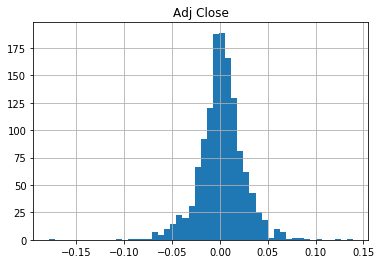

         Adj Close
count  1322.000000
mean      0.001566
std       0.023992
min      -0.179195
25%      -0.010672
50%       0.001677
75%       0.014306
max       0.139050


In [55]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

In [76]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

            Adj Close
2006-10-02        NaN
2006-10-03   0.989581
2006-10-04   1.006946
2006-10-05   0.999599
2006-10-06   0.991451
2006-10-09   0.996928
2006-10-10   0.985974
2006-10-11   0.978226
2006-10-12   1.005343
2006-10-13   1.002137
2006-10-16   1.007213
2006-10-17   0.992386
2006-10-18   0.995592
2006-10-19   1.055170
2006-10-20   1.067994
2006-10-23   1.088165
2006-10-24   1.082688
2006-10-25   1.091103
2006-10-26   1.097916
2006-10-27   1.074138
2006-10-30   1.074272
2006-10-31   1.083088
2006-11-01   1.057441
2006-11-02   1.055036
2006-11-03   1.045819
2006-11-06   1.064788
2006-11-07   1.075474
2006-11-08   1.101389
2006-11-09   1.113278
2006-11-10   1.110339
...               ...
2011-11-17   5.041545
2011-11-18   5.008550
2011-11-21   4.929335
2011-11-22   5.029522
2011-11-23   4.902351
2011-11-25   4.856666
2011-11-28   5.024313
2011-11-29   4.985306
2011-11-30   5.105530
2011-12-01   5.182074
2011-12-02   5.205718
2011-12-05   5.249934
2011-12-06   5.222415
2011-12-07

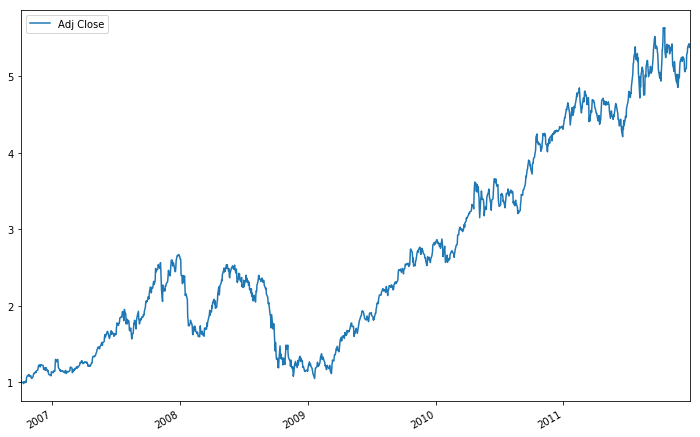

In [77]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [78]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

            Adj Close
2006-10-31   1.031710
2006-11-30   1.140058
2006-12-31   1.155110
2007-01-31   1.187303
2007-02-28   1.145176
2007-03-31   1.210302
2007-04-30   1.251737
2007-05-31   1.453453
2007-06-30   1.625638
2007-07-31   1.818073
2007-08-31   1.734484
2007-09-30   1.897943
2007-10-31   2.295090
2007-11-30   2.333130
2007-12-31   2.544817
2008-01-31   2.142374
2008-02-29   1.671828
2008-03-31   1.747569
2008-04-30   2.113108
2008-05-31   2.468068
2008-06-30   2.384260
2008-07-31   2.240832
2008-08-31   2.285193
2008-09-30   1.886767
2008-10-31   1.322521
2008-11-30   1.254883
2008-12-31   1.222865
2009-01-31   1.185880
2009-02-28   1.256669
2009-03-31   1.302498
...               ...
2009-07-31   1.994633
2009-08-31   2.221219
2009-09-30   2.374922
2009-10-31   2.575893
2009-11-30   2.675929
2009-12-31   2.657688
2010-01-31   2.774716
2010-02-28   2.655568
2010-03-31   2.984383
2010-04-30   3.354910
2010-05-31   3.359090
2010-06-30   3.488451
2010-07-31   3.405691
2010-08-31

In [59]:
from pandas_datareader import data as pdr
import fix_yahoo_finance

def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
all_data.head()

https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1159653600&period2=1325372400&interval=1d&events=history&crumb=DujEI1VwC3H
https://query1.finance.yahoo.com/v7/finance/download/MSFT?period1=1159653600&period2=1325372400&interval=1d&events=history&crumb=DujEI1VwC3H
https://query1.finance.yahoo.com/v7/finance/download/IBM?period1=1159653600&period2=1325372400&interval=1d&events=history&crumb=DujEI1VwC3H
https://query1.finance.yahoo.com/v7/finance/download/GOOG?period1=1159653600&period2=1325372400&interval=1d&events=history&crumb=DujEI1VwC3H


Open       High        Low      Close  Adj Close  \
Ticker Date                                                                
AAPL   2006-10-02  10.728572  10.838572  10.614285  74.860001  10.694285   
       2006-10-03  10.635715  10.707143  10.455714  74.080002  10.582857   
       2006-10-04  10.585714  10.780000  10.451428  75.380005  10.768572   
       2006-10-05  10.647142  10.880000  10.590000  74.829994  10.690000   
       2006-10-06  10.631429  10.720000  10.544286  74.220001  10.602858   

                      Volume  
Ticker Date                   
AAPL   2006-10-02  178159800  
       2006-10-03  197677200  
       2006-10-04  207270700  
       2006-10-05  170970800  
       2006-10-06  116739700

In [60]:
#all_data = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/all_stock_data.csv", index_col= [0,1], header=0, parse_dates=[1])

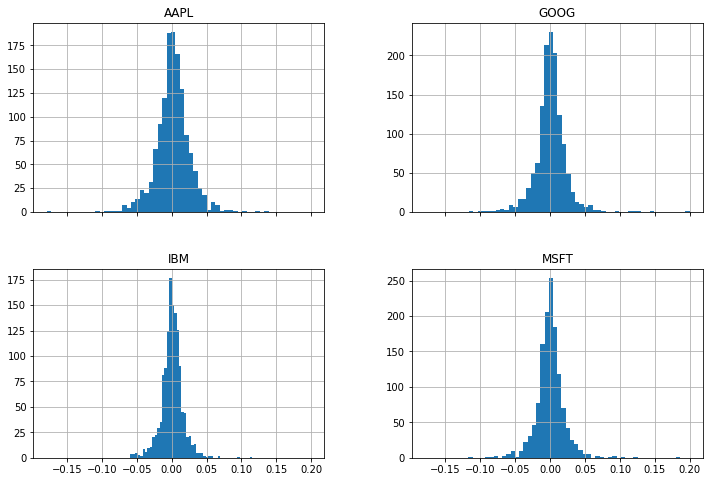

In [61]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

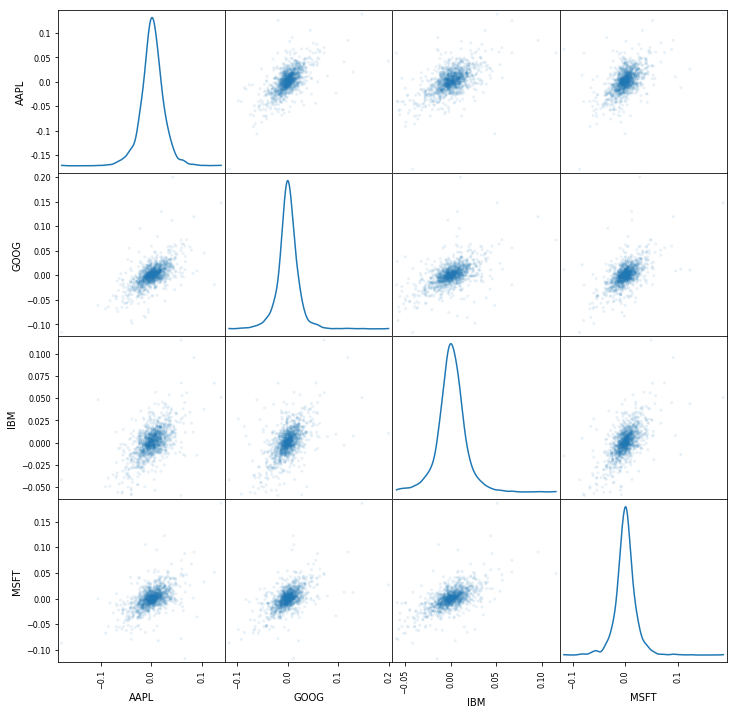

In [62]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

### Moving Windows

In [63]:
# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

2011-12-16    55.529679
2011-12-19    55.491607
2011-12-20    55.456536
2011-12-21    55.451822
2011-12-22    55.444500
2011-12-23    55.439643
2011-12-27    55.445286
2011-12-28    55.437643
2011-12-29    55.468393
2011-12-30    55.495500
Name: Adj Close, dtype: float64

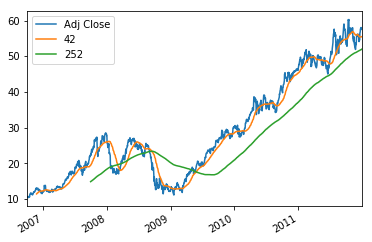

In [64]:
# Short moving window rolling mean
aapl['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
aapl['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj Close', '42', '252']].plot()

plt.show()

### Volatility Calculation

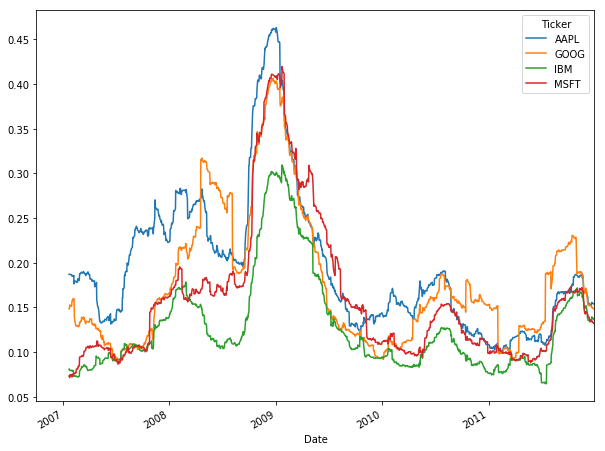

In [65]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

### Ordinary Least-Squares Regression (OLS)

In [66]:
# Import the `api` model of `statsmodels` under alias `sm`
import statsmodels.api as sm
from pandas.core import datetools

# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

# Add a constant 
X = sm.add_constant(return_data['AAPL'])

# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     514.2
Date:                Thu, 01 Jun 2017   Prob (F-statistic):           2.07e-96
Time:                        12:08:42   Log-Likelihood:                 3513.2
No. Observations:                1322   AIC:                            -7022.
Df Residuals:                    1320   BIC:                            -7012.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.000     -1.287      0.1

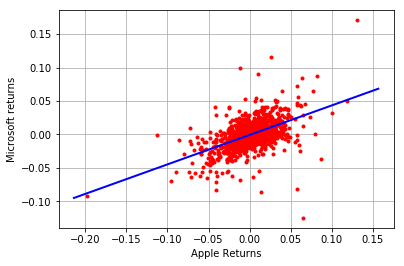

In [67]:
plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)

plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

plt.show()

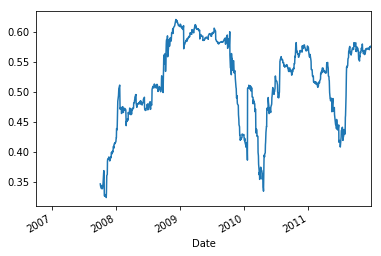

In [68]:
return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot()
plt.show()

<a id='tradingstrategy'></a>
## Building A Trading Strategy With Python

In [69]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

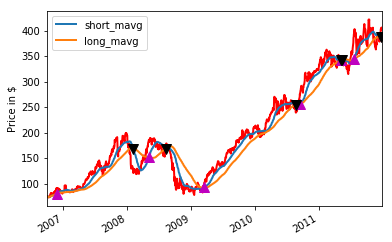

In [70]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

<a id='backtesting'></a>
## Backtesting A Strategy

### Implementation Of A Simple Backtester With Pandas

In [71]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

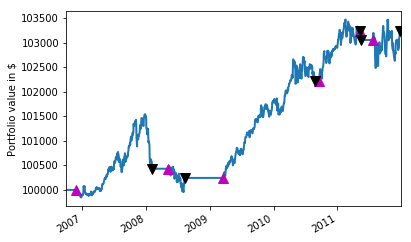

In [72]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

<a id='evaluating'></a>
## Evaluating Moving Average Crossover Strategy 

### Sharpe Ratio

In [73]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.726876950013


### Maximum Drawdown

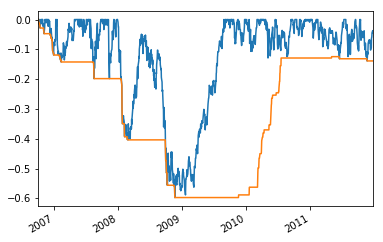

In [74]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = aapl['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

### Compound Annual Growth Rate (CAGR)

In [75]:
# Get the number of days in `aapl`
days = (aapl.index[-1] - aapl.index[0]).days

# Calculate the CAGR 
cagr = ((((aapl['Adj Close'][-1]) / aapl['Adj Close'][1])) ** (365.0/days)) - 1